### Read data

In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [93]:
breast_cancer = load_breast_cancer()
print(len(breast_cancer.feature_names))
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['target'] = pd.Series(breast_cancer.target)
data.head()

30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [95]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Data Analysis

In [96]:
col = data.columns       
print(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


Number of Benign:  357
Number of Malignant :  212


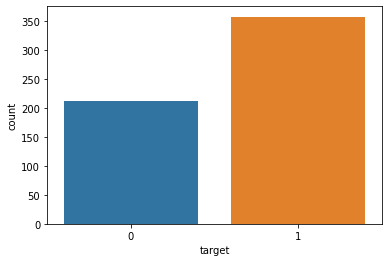

In [97]:
ax = sns.countplot(data.target,label="Count")
B, M = data.target.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

### Data Visualization

In [98]:
print(data.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


Our dataset already contains the mean values of all the columns

In [99]:
featureMeans = list(data.columns[:10])
featureMeans

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


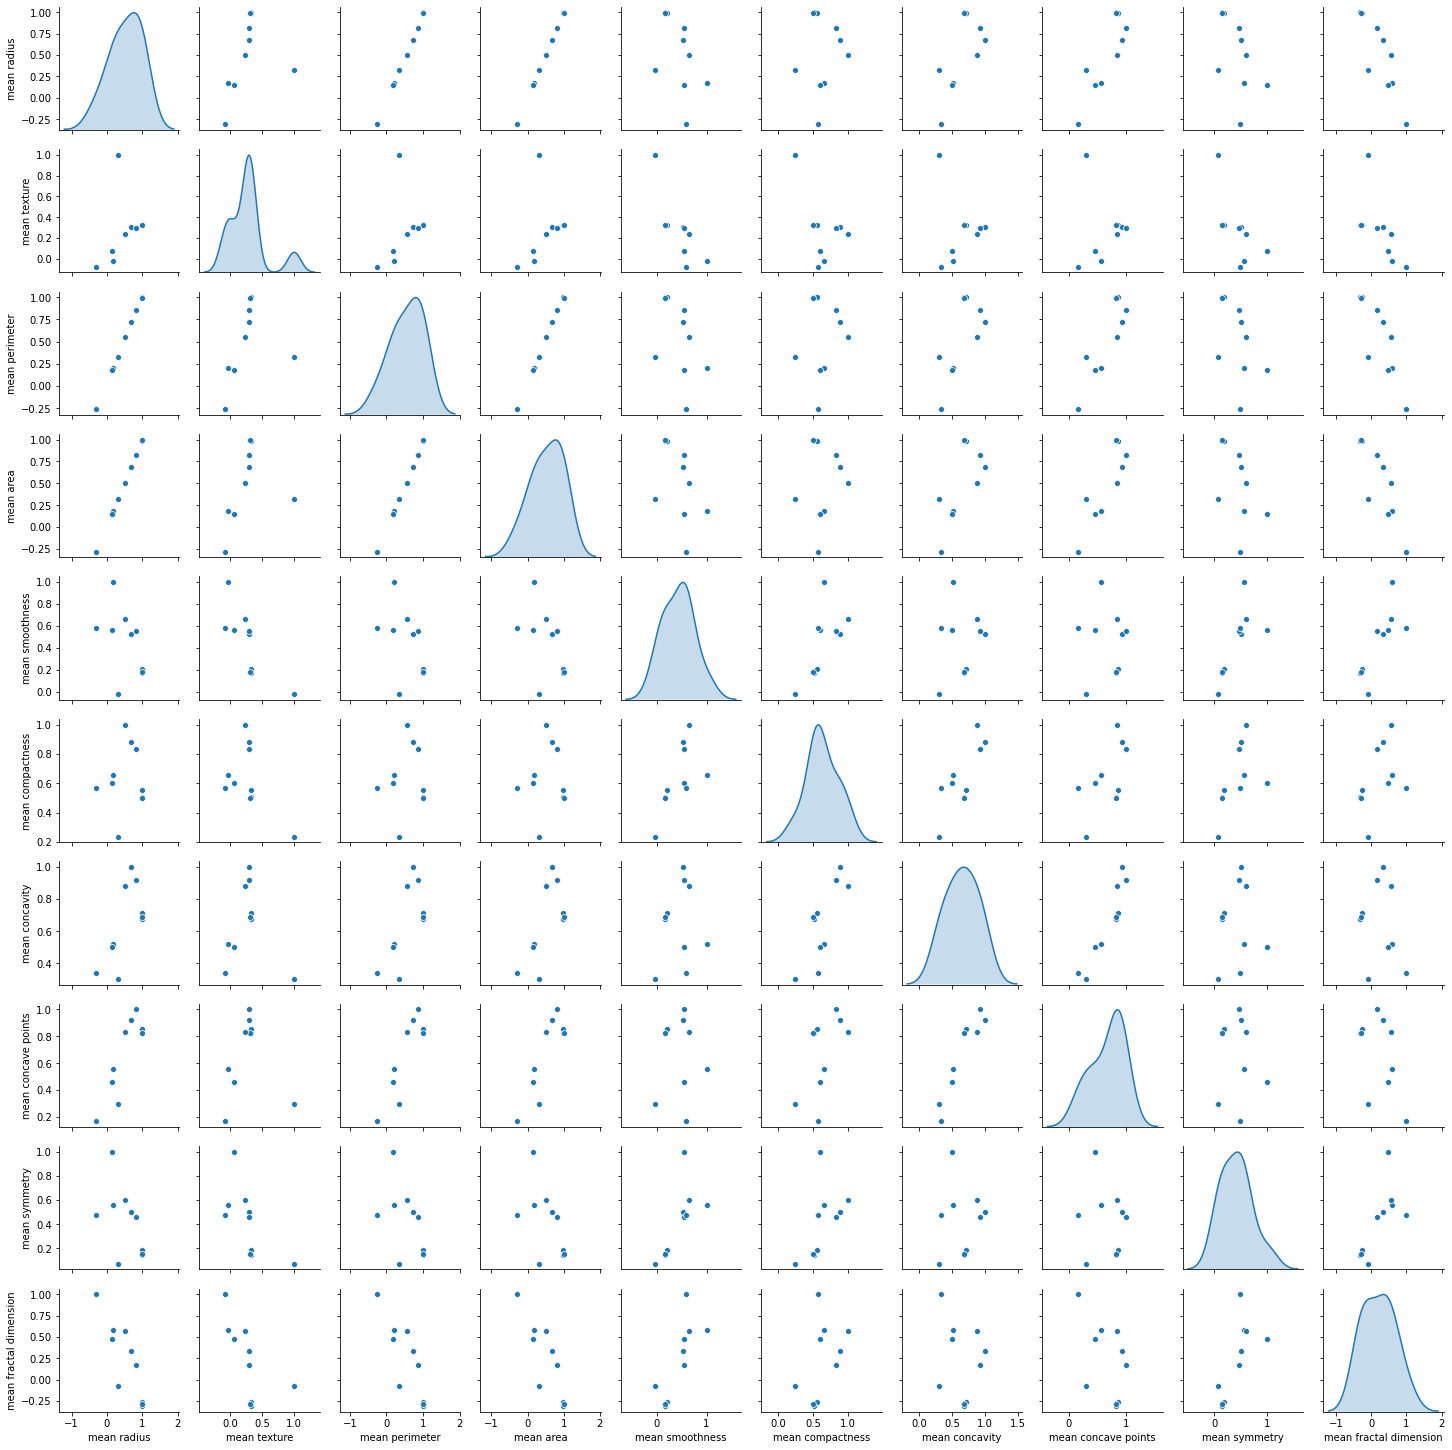

In [100]:
correlationData = data[featureMeans].corr()
sns.pairplot(data[featureMeans].corr(), diag_kind='kde', size=2);

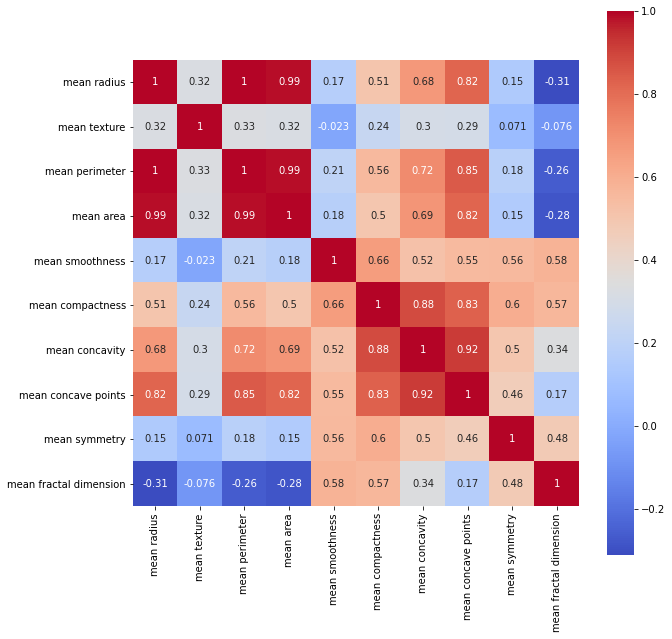

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(data[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

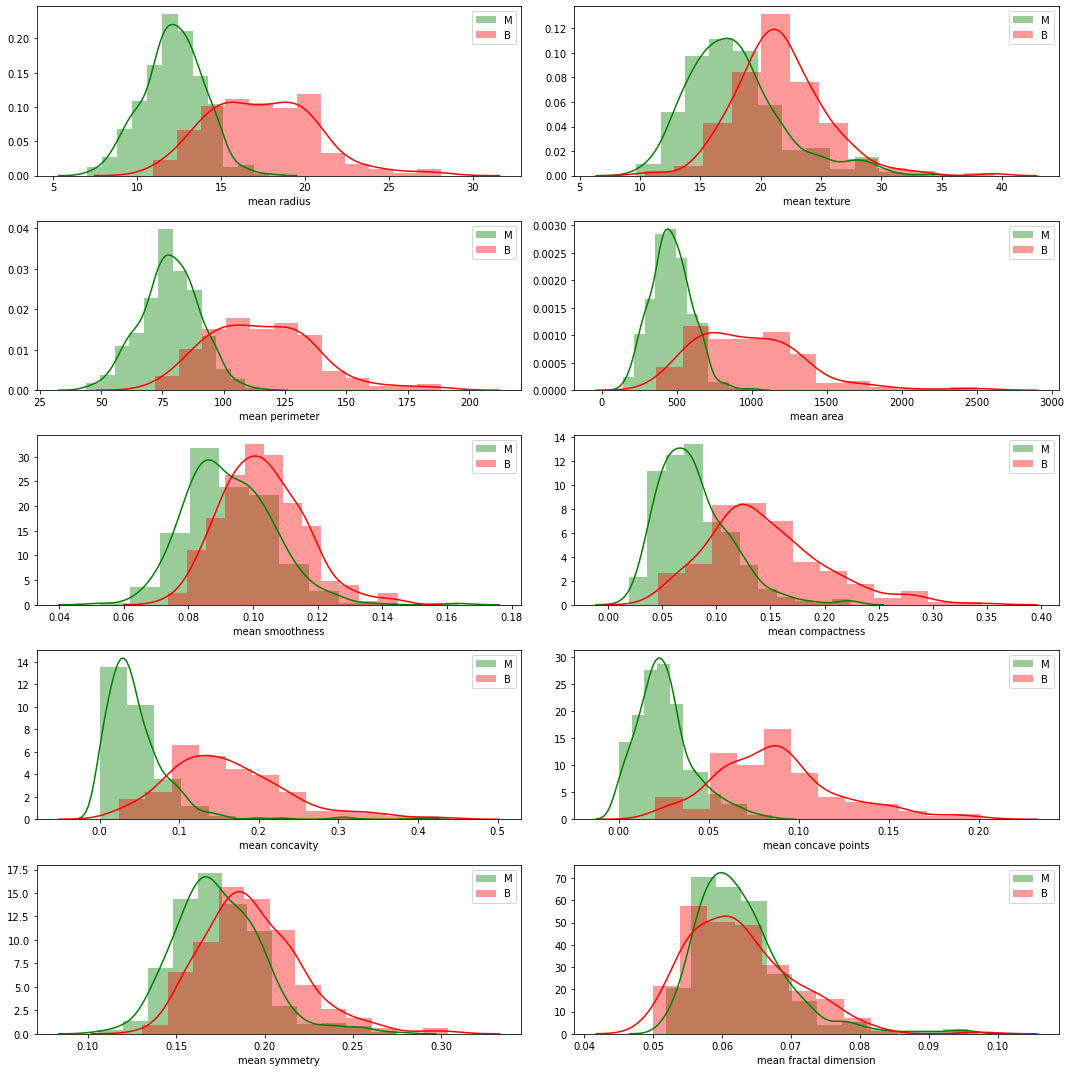

In [103]:
bins = 12
plt.figure(figsize=(15,15))
for idx,atr in enumerate(featureMeans):
    plt.subplot(5, 2, idx+1)
    sns.distplot(data[data['target']==1][atr], bins=bins, color='green', label='M')
    sns.distplot(data[data['target']==0][atr], bins=bins, color='red', label='B')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

[]

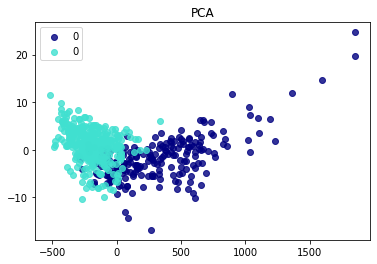

In [105]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(data.loc[:,featureMeans])

colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0, 1], data.loc[:, 'target']):
    plt.scatter(X_r[data.loc[:, 'target'] == i, 0], X_r[data.loc[:, 'target'] == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.plot()

### Clean Dataset

In [106]:
X = data.loc[:,featureMeans]
y = data.loc[:, 'target']

### Data Preprocessing

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 42)

### Models

#### Cross validation
5 cicle with 20% of test data

In [108]:
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors = 5))])
scores = cross_val_score(pipeline, X, y, cv=5) 

print('Accuracy - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Accuracy - 94.20 +- 1.20


#### Grid Search

In [109]:
data_gs, data_cv, target_gs, target_cv = train_test_split(X, y, test_size=0.95, random_state=42)


- K values between 3 and 7
- p values of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski).

In [111]:
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
parameters = {'clf__n_neighbors': [3,4,5,6,7], 'clf__p': [1, 2, 5]}
clf = GridSearchCV(pipeline, 
                    parameters,
                    scoring='accuracy',
                    cv=5)
result = clf.fit(data_gs, target_gs)
scores = cross_val_score(clf.best_estimator_, data_cv, target_cv, cv=5)

print(clf.best_params_)
print('Accuracy - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

{'clf__n_neighbors': 3, 'clf__p': 1}
Accuracy - 92.42 +- 1.90


#### K Fold

In [112]:
clf = result.best_estimator_
kf = StratifiedKFold(n_splits = 5)
acc = []
for train_index, test_index in kf.split(data_cv, target_cv):
    X_train,X_test = data_cv.iloc[train_index],data_cv.iloc[test_index]
    y_train,y_test = target_cv.iloc[train_index],target_cv.iloc[test_index]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))

acc = np.array(acc)
print('Accuracy - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Accuracy - 92.42 +- 1.90


### Conclusion
**Cross validation:** 94.20 +- 1.20

**Grid Search:** {'clfn_neighbors': 3, 'clfp': 1} 92.42 +- 1.90

**KFold:** 92.42 +- 1.90